In [ ]:
#importing important lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_train=pd.read_csv("train.csv")# taking training data from csv file
data_test=pd.read_csv("Test.csv")# taking test data
data_train.shape#finding the shape of the taraning data

(891, 12)

In [ ]:
data_test.shape#finding the shape of the test data

(418, 11)

In [ ]:
data_train['Survived'].value_counts() #This gives the counts of death and lived rate in the csv 0= dead and 1 is alive

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


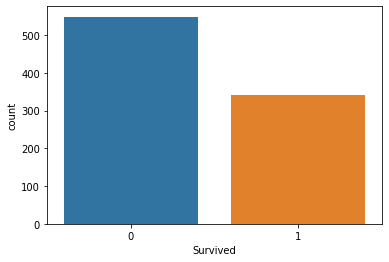

In [ ]:
sns.countplot(data_train['Survived'],label="Count")#shows the bar chart for the above count using seaborn

In [ ]:
data_train.groupby('Sex')[['Survived']].mean()#this is used to find the mean value for the survuvred rate of male and female

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
data_train.pivot_table('Survived', index='Sex', columns='Pclass') #gives a ratio for male and female survived with respect to the class

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


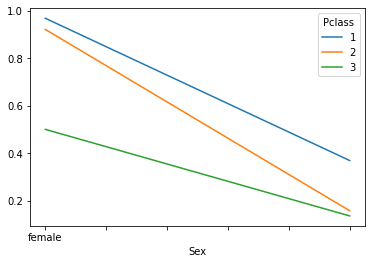

In [ ]:
data_train.pivot_table('Survived', index='Sex', columns='Pclass').plot()

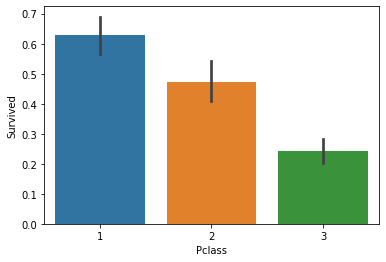

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=data_train)

In [ ]:
age = pd.cut(data_train['Age'], [0, 18, 80])#restring the final data of the age or grouping it to 0-18 and 18-80
data_train.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [ ]:
data_train.isna().sum()#checking the blanks in the data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
for val in data_train:
   print(data_train[val].value_counts())
   print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Abelson, Mr. Samuel                                1
Calic, Mr. Petar                                   1
Bourke, Mrs. John (Catherine)                      1
Zabour, Miss. Hileni                               1
Downton, Mr. William James                         1
                                                  ..
Watson, Mr. Ennis Hastings                         1
Harper, Miss. Annie Jessie "Nina"                  1
O'Connell, Mr. Patrick D                           1
Hippach, Mrs. Louis Albert (Ida Sophia Fischer)    1
Elsbury, Mr. William James                         1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50

In [ ]:
data_train = data_train.drop(['Cabin','Ticket', 'Name'], axis=1)#cabin, name, ticket are irrelevent so the table is dropped they are non integer

In [ ]:
data_train = data_train.dropna(subset =['Embarked', 'Age'])#droping the blank row from the data


In [ ]:
data_train.shape#finding the shape of the data after non relevant data are removed

(712, 9)

In [ ]:
print(data_train['Sex'].unique())#finding uniqueness in the sex
print(data_train['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
data_train.dtypes #finding the data types of the training data

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder#preparing the data to renamed or relabeled
labelencoder = LabelEncoder()
data_train.iloc[:,3]= labelencoder.fit_transform(data_train.iloc[:,3].values)#giving the position of sex

data_train.iloc[:,8]= labelencoder.fit_transform(data_train.iloc[:,8].values)#giving the position of Embarked

print(data_train['Sex'].unique())
print(data_train['Embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
X = data_train.iloc[:, 2:9].values #giving values to x axis
Y = data_train.iloc[:, 1].values #giving values to y axis

In [ ]:
from sklearn.model_selection import train_test_split#spliting data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler#preprossing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [ ]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Nearest Neighbor Training Accuracy: 0.8664323374340949
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8506151142355008
[4]Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[5]Decision Tree Classifier Training Accuracy: 0.9929701230228472
[6]Random Forest Classifier Training Accuracy: 0.9753954305799648


In [ ]:

from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()

[[73  9]
 [18 43]]
Model[0] Testing Accuracy = "0.8111888111888111 !"

[[71 11]
 [20 41]]
Model[1] Testing Accuracy = "0.7832167832167832 !"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902 !"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972 !"

[[69 13]
 [23 38]]
Model[4] Testing Accuracy = "0.7482517482517482 !"

[[60 22]
 [10 51]]
Model[5] Testing Accuracy = "0.7762237762237763 !"

[[67 15]
 [13 48]]
Model[6] Testing Accuracy = "0.8041958041958042 !"



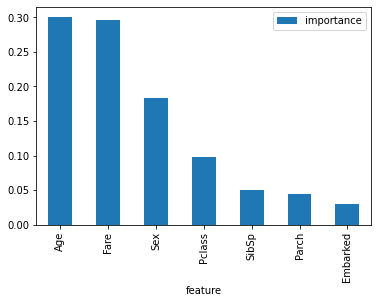

In [ ]:
forest = model[6]#importance iof random forest
importances = pd.DataFrame({'feature':data_train.iloc[:, 2:9].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [ ]:
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data_test = data_test.drop(['Cabin','Ticket', 'Name'], axis=1)
data_test= data_test.dropna(subset =['Embarked', 'Age','Fare'])
data_test.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_test.iloc[:,2]= labelencoder.fit_transform(data_test.iloc[:,2].values)

data_test.iloc[:,7]= labelencoder.fit_transform(data_test.iloc[:,7].values)

print(data_test['Sex'].unique())
print(data_test['Embarked'].unique())

[1 0]
[1 2 0]


In [ ]:
data_test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
5,897,3,1,14.0,0,0,9.2250,2
6,898,3,0,30.0,0,0,7.6292,1
7,899,2,1,26.0,1,1,29.0000,2
8,900,3,0,18.0,0,0,7.2292,0
9,901,3,1,21.0,2,0,24.1500,2


In [ ]:
last = data_test.iloc[:, 1:8].values 
myid=892

In [ ]:
my=int(input("Enter the model number "))
pred = model[my].predict(last)
print(pred)

[0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1
 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0]


In [ ]:
list1 = pred.tolist()
print(list1)

[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]


In [ ]:
print("PassengerID \t   Survivual")
naman=892
for i in list1:
  print(naman,"\t\t\t",i)
  naman=naman+1


PassengerID 	   Survivual
892 			 0
893 			 0
894 			 0
895 			 0
896 			 1
897 			 1
898 			 0
899 			 1
900 			 0
901 			 1
902 			 1
903 			 1
904 			 1
905 			 1
906 			 1
907 			 0
908 			 0
909 			 0
910 			 0
911 			 1
912 			 0
913 			 1
914 			 1
915 			 0
916 			 1
917 			 0
918 			 1
919 			 1
920 			 1
921 			 1
922 			 1
923 			 0
924 			 0
925 			 0
926 			 0
927 			 0
928 			 1
929 			 1
930 			 0
931 			 1
932 			 1
933 			 1
934 			 1
935 			 1
936 			 1
937 			 1
938 			 1
939 			 0
940 			 0
941 			 1
942 			 0
943 			 1
944 			 0
945 			 0
946 			 1
947 			 0
948 			 1
949 			 1
950 			 1
951 			 0
952 			 0
953 			 0
954 			 1
955 			 1
956 			 1
957 			 1
958 			 1
959 			 0
960 			 1
961 			 1
962 			 1
963 			 0
964 			 0
965 			 1
966 			 1
967 			 1
968 			 1
969 			 0
970 			 1
971 			 0
972 			 0
973 			 0
974 			 1
975 			 1
976 			 0
977 			 1
978 			 1
979 			 0
980 			 1
981 			 0
982 			 1
983 			 0
984 			 1
985 			 1
986 			 1
987 			 1
988 			 1
989 